# Data Exploration

In [1]:
import os
os.chdir('..')

In [2]:
from IPython.display import Image, display
from modules import constants
import matplotlib.pyplot as plt
import ipyplot
import seaborn as sns
import polars as pl
import pandas as pd
import numpy as  np

In [3]:
train_metadata = pd.read_csv(constants.train_metadata_path)
test_metadata = pd.read_csv(constants.test_metadata_path)
target_metadata = pd.read_csv(constants.target_name_metadata_path, sep='\t')

train_metadata['path'] = constants.train_images_path + '/' + train_metadata['id'].astype(str) + '.jpeg'
train_metadata

,id,WORLDCLIM_BIO1_annual_mean_temperature,WORLDCLIM_BIO12_annual_precipitation,WORLDCLIM_BIO13.BIO14_delta_precipitation_of_wettest_and_dryest_month,WORLDCLIM_BIO15_precipitation_seasonality,WORLDCLIM_BIO4_temperature_seasonality,WORLDCLIM_BIO7_temperature_annual_range,SOIL_bdod_0.5cm_mean_0.01_deg,SOIL_bdod_100.200cm_mean_0.01_deg,SOIL_bdod_15.30cm_mean_0.01_deg,...,X26_mean,X50_mean,X3112_mean,X4_sd,X11_sd,X18_sd,X26_sd,X50_sd,X3112_sd,path
0,192027691,12.235703,374.466675,62.524445,72.256844,773.592041,33.277779,125,149,136,...,1.243779,1.849375,50.216034,0.008921,1.601473,0.025441,0.153608,0.279610,15.045054,/home/pol/projects/plant_traits_2024/data/trai...
1,195542235,17.270555,90.239998,10.351111,38.220940,859.193298,40.009777,124,144,138,...,0.642940,1.353468,574.098472,0.003102,0.258078,0.000866,0.034630,0.010165,11.004477,/home/pol/projects/plant_traits_2024/data/trai...
2,196639184,14.254504,902.071411,49.642857,17.873655,387.977753,22.807142,107,133,119,...,0.395241,2.343153,1130.096731,NaN,NaN,NaN,NaN,NaN,NaN,/home/pol/projects/plant_traits_2024/data/trai...
3,195728812,18.680834,1473.933350,163.100006,45.009758,381.053986,20.436666,120,131,125,...,0.154200,1.155308,1042.686546,0.011692,2.818356,0.110673,0.011334,0.229224,141.857187,/home/pol/projects/plant_traits_2024/data/trai...
4,195251545,0.673204,530.088867,50.857777,38.230709,1323.526855,45.891998,91,146,120,...,10.919966,2.246226,2386.467180,0.006157,1.128000,0.026996,0.553815,0.107092,87.146899,/home/pol/projects/plant_traits_2024/data/trai...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55484,190558785,19.472172,244.795914,39.127552,67.074493,472.710358,27.758673,118,140,131,...,1.783193,1.608341,969.547831,NaN,NaN,NaN,NaN,NaN,NaN,/home/pol/projects/plant_traits_2024/data/trai...
55485,194523231,13.724150,1450.000000,162.260208,43.139324,652.716858,26.694387,125,144,135,...,12.713048,2.418300,1630.015480,0.005474,0.128133,0.117010,3.164520,0.082212,136.503697,/home/pol/projects/plant_traits_2024/data/trai...
55486,195888987,14.741204,581.866638,109.231110,89.272148,507.273010,26.874668,118,155,136,...,10.206478,2.722599,602.229880,0.019727,0.215040,0.156309,0.919139,0.079395,26.159626,/home/pol/projects/plant_traits_2024/data/trai...
55487,135487319,16.094763,1180.838135,80.176193,22.909716,342.184021,17.346189,109,130,117,...,9.372170,3.251739,244.387170,NaN,NaN,NaN,NaN,NaN,NaN,/home/pol/projects/plant_traits_2024/data/trai...


Images are very diverse, with different quality, zoom in and out, different type of plants, fortunately all of them have same size 512x512 which will make data preparation much easier

In [11]:
images = ['../' + os.path.relpath(p, constants.root_path) for p in train_metadata['path'].values]
labels = train_metadata['id'].values

ipyplot.plot_images(images, labels,  max_images=70, img_width=150, show_url=False)

In [5]:
target_metadata

,trait_ID,trait_name
0,X4,Stem specific density (SSD) or wood density (s...
1,X11,Leaf area per leaf dry mass (specific leaf are...
2,X18,Plant height
3,X26,Seed dry mass
4,X50,Leaf nitrogen (N) content per leaf area
5,X3112,"Leaf area (in case of compound leaves: leaf, u..."


In [9]:
for i in target_metadata['trait_name ']:
    print(i)

Stem specific density (SSD) or wood density (stem dry mass per stem fresh volume) 
Leaf area per leaf dry mass (specific leaf area, SLA or 1/LMA) 
Plant height 
Seed dry mass 
Leaf nitrogen (N) content per leaf area 
Leaf area (in case of compound leaves: leaf, undefined if petiole in- or excluded) 


In [6]:
train_metadata.describe()

,id,WORLDCLIM_BIO1_annual_mean_temperature,WORLDCLIM_BIO12_annual_precipitation,WORLDCLIM_BIO13.BIO14_delta_precipitation_of_wettest_and_dryest_month,WORLDCLIM_BIO15_precipitation_seasonality,WORLDCLIM_BIO4_temperature_seasonality,WORLDCLIM_BIO7_temperature_annual_range,SOIL_bdod_0.5cm_mean_0.01_deg,SOIL_bdod_100.200cm_mean_0.01_deg,SOIL_bdod_15.30cm_mean_0.01_deg,...,X18_mean,X26_mean,X50_mean,X3112_mean,X4_sd,X11_sd,X18_sd,X26_sd,X50_sd,X3112_sd
count,5.548900e+04,55489.000000,55489.000000,55489.000000,55489.000000,55489.000000,55489.000000,55489.000000,55489.000000,55489.000000,...,5.548900e+04,5.548900e+04,55489.000000,5.548900e+04,39148.000000,39148.000000,39148.000000,39148.000000,39148.000000,39148.000000
mean,1.714553e+08,14.577142,1058.710939,138.164359,56.727213,518.711405,25.227185,116.895673,140.259205,128.187695,...,1.969902e+04,3.459399e+03,13.528574,3.975552e+05,0.007833,1.073573,16.003476,110.733150,0.075108,453.017146
std,4.087868e+07,7.584290,768.992166,136.409312,31.692061,316.618440,9.151237,17.607857,15.075214,16.030602,...,2.309747e+06,2.471919e+05,1356.480785,9.152463e+07,0.012046,4.098486,881.605417,8361.855750,0.159520,4196.228211
min,2.637500e+04,-13.731130,0.000000,0.000000,0.000000,9.877081,7.658674,29.000000,46.000000,42.000000,...,2.330000e-08,5.500000e-07,0.000097,7.690000e-08,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.658614e+08,9.247916,528.315552,53.000000,29.685472,300.478760,18.800001,106.000000,131.000000,118.000000,...,3.102831e-01,5.613414e-01,1.173489,2.552815e+02,0.003292,0.174866,0.029985,0.042226,0.017207,17.259899
50%,1.915103e+08,15.536692,853.776184,95.500000,50.196312,446.522308,23.681778,118.000000,142.000000,129.000000,...,7.156651e-01,2.519985e+00,1.480060,7.244318e+02,0.004996,0.357821,0.095136,0.238664,0.033162,63.322952
75%,1.951001e+08,20.238457,1352.000000,181.485718,80.811249,690.003845,30.399998,130.000000,150.000000,139.000000,...,3.586311e+00,1.491886e+01,1.926343,2.148630e+03,0.007774,1.092862,0.330147,1.516574,0.082851,226.990400
max,1.967668e+08,30.294445,8392.463867,2448.964355,169.582291,2025.894653,63.657616,194.000000,192.000000,201.000000,...,2.720494e+08,3.106555e+07,159759.897700,2.155911e+10,0.284052,515.672017,63535.386846,739701.798818,9.729029,387491.201058


Considering there is a big amount of numerical traits, we can start by building a simple model that uses only this to predict, and see the results

In [7]:
for col in train_metadata.columns:
    print(col)

id
WORLDCLIM_BIO1_annual_mean_temperature
WORLDCLIM_BIO12_annual_precipitation
WORLDCLIM_BIO13.BIO14_delta_precipitation_of_wettest_and_dryest_month
WORLDCLIM_BIO15_precipitation_seasonality
WORLDCLIM_BIO4_temperature_seasonality
WORLDCLIM_BIO7_temperature_annual_range
SOIL_bdod_0.5cm_mean_0.01_deg
SOIL_bdod_100.200cm_mean_0.01_deg
SOIL_bdod_15.30cm_mean_0.01_deg
SOIL_bdod_30.60cm_mean_0.01_deg
SOIL_bdod_5.15cm_mean_0.01_deg
SOIL_bdod_60.100cm_mean_0.01_deg
SOIL_cec_0.5cm_mean_0.01_deg
SOIL_cec_100.200cm_mean_0.01_deg
SOIL_cec_15.30cm_mean_0.01_deg
SOIL_cec_30.60cm_mean_0.01_deg
SOIL_cec_5.15cm_mean_0.01_deg
SOIL_cec_60.100cm_mean_0.01_deg
SOIL_cfvo_0.5cm_mean_0.01_deg
SOIL_cfvo_100.200cm_mean_0.01_deg
SOIL_cfvo_15.30cm_mean_0.01_deg
SOIL_cfvo_30.60cm_mean_0.01_deg
SOIL_cfvo_5.15cm_mean_0.01_deg
SOIL_cfvo_60.100cm_mean_0.01_deg
SOIL_clay_0.5cm_mean_0.01_deg
SOIL_clay_100.200cm_mean_0.01_deg
SOIL_clay_15.30cm_mean_0.01_deg
SOIL_clay_30.60cm_mean_0.01_deg
SOIL_clay_5.15cm_mean_0.01_deg
S

All photo ids are unique, we don't know if photos are unique though

In [19]:
len(train_metadata.id.unique()) == len(train_metadata)

True

This are the list of all the features not present in the test data, so basically what we would like to predict, we would only need the mean though, the sd is only available as a data augmentation technique

In [8]:
list(set(train_metadata.columns) - set(test_metadata.columns))

['X4_mean',
 'X4_sd',
 'X3112_mean',
 'X11_mean',
 'X50_sd',
 'X18_sd',
 'X11_sd',
 'X18_mean',
 'X50_mean',
 'path',
 'X26_mean',
 'X3112_sd',
 'X26_sd']

In [9]:
target_vars = list(target_metadata.trait_ID + '_mean')
print('Target vars', target_vars)

Target vars ['X4_mean', 'X11_mean', 'X18_mean', 'X26_mean', 'X50_mean', 'X3112_mean']


In [10]:
all_cols = train_metadata.columns
world_climate_vars = list(all_cols[all_cols.str.startswith('WORLDCLIM')])
soil_vars = list(all_cols[all_cols.str.startswith('SOIL')])
modis_vars = list(all_cols[all_cols.str.startswith('MODIS')])
vod_vars = list(all_cols[all_cols.str.startswith('VOD')])
train_vars = world_climate_vars + soil_vars + modis_vars + vod_vars 
train_vars

['WORLDCLIM_BIO1_annual_mean_temperature',
 'WORLDCLIM_BIO12_annual_precipitation',
 'WORLDCLIM_BIO13.BIO14_delta_precipitation_of_wettest_and_dryest_month',
 'WORLDCLIM_BIO15_precipitation_seasonality',
 'WORLDCLIM_BIO4_temperature_seasonality',
 'WORLDCLIM_BIO7_temperature_annual_range',
 'SOIL_bdod_0.5cm_mean_0.01_deg',
 'SOIL_bdod_100.200cm_mean_0.01_deg',
 'SOIL_bdod_15.30cm_mean_0.01_deg',
 'SOIL_bdod_30.60cm_mean_0.01_deg',
 'SOIL_bdod_5.15cm_mean_0.01_deg',
 'SOIL_bdod_60.100cm_mean_0.01_deg',
 'SOIL_cec_0.5cm_mean_0.01_deg',
 'SOIL_cec_100.200cm_mean_0.01_deg',
 'SOIL_cec_15.30cm_mean_0.01_deg',
 'SOIL_cec_30.60cm_mean_0.01_deg',
 'SOIL_cec_5.15cm_mean_0.01_deg',
 'SOIL_cec_60.100cm_mean_0.01_deg',
 'SOIL_cfvo_0.5cm_mean_0.01_deg',
 'SOIL_cfvo_100.200cm_mean_0.01_deg',
 'SOIL_cfvo_15.30cm_mean_0.01_deg',
 'SOIL_cfvo_30.60cm_mean_0.01_deg',
 'SOIL_cfvo_5.15cm_mean_0.01_deg',
 'SOIL_cfvo_60.100cm_mean_0.01_deg',
 'SOIL_clay_0.5cm_mean_0.01_deg',
 'SOIL_clay_100.200cm_mean_0.01_d

In [11]:
corr = train_metadata[target_vars + train_vars].corr().iloc[0:6, :]
corr.style.background_gradient(cmap='coolwarm')

,X4_mean,X11_mean,X18_mean,X26_mean,X50_mean,X3112_mean,WORLDCLIM_BIO1_annual_mean_temperature,WORLDCLIM_BIO12_annual_precipitation,WORLDCLIM_BIO13.BIO14_delta_precipitation_of_wettest_and_dryest_month,WORLDCLIM_BIO15_precipitation_seasonality,WORLDCLIM_BIO4_temperature_seasonality,WORLDCLIM_BIO7_temperature_annual_range,SOIL_bdod_0.5cm_mean_0.01_deg,SOIL_bdod_100.200cm_mean_0.01_deg,SOIL_bdod_15.30cm_mean_0.01_deg,SOIL_bdod_30.60cm_mean_0.01_deg,SOIL_bdod_5.15cm_mean_0.01_deg,SOIL_bdod_60.100cm_mean_0.01_deg,SOIL_cec_0.5cm_mean_0.01_deg,SOIL_cec_100.200cm_mean_0.01_deg,SOIL_cec_15.30cm_mean_0.01_deg,SOIL_cec_30.60cm_mean_0.01_deg,SOIL_cec_5.15cm_mean_0.01_deg,SOIL_cec_60.100cm_mean_0.01_deg,SOIL_cfvo_0.5cm_mean_0.01_deg,SOIL_cfvo_100.200cm_mean_0.01_deg,SOIL_cfvo_15.30cm_mean_0.01_deg,SOIL_cfvo_30.60cm_mean_0.01_deg,SOIL_cfvo_5.15cm_mean_0.01_deg,SOIL_cfvo_60.100cm_mean_0.01_deg,SOIL_clay_0.5cm_mean_0.01_deg,SOIL_clay_100.200cm_mean_0.01_deg,SOIL_clay_15.30cm_mean_0.01_deg,SOIL_clay_30.60cm_mean_0.01_deg,SOIL_clay_5.15cm_mean_0.01_deg,SOIL_clay_60.100cm_mean_0.01_deg,SOIL_nitrogen_0.5cm_mean_0.01_deg,SOIL_nitrogen_100.200cm_mean_0.01_deg,SOIL_nitrogen_15.30cm_mean_0.01_deg,SOIL_nitrogen_30.60cm_mean_0.01_deg,SOIL_nitrogen_5.15cm_mean_0.01_deg,SOIL_nitrogen_60.100cm_mean_0.01_deg,SOIL_ocd_0.5cm_mean_0.01_deg,SOIL_ocd_100.200cm_mean_0.01_deg,SOIL_ocd_15.30cm_mean_0.01_deg,SOIL_ocd_30.60cm_mean_0.01_deg,SOIL_ocd_5.15cm_mean_0.01_deg,SOIL_ocd_60.100cm_mean_0.01_deg,SOIL_ocs_0.30cm_mean_0.01_deg,SOIL_phh2o_0.5cm_mean_0.01_deg,SOIL_phh2o_100.200cm_mean_0.01_deg,SOIL_phh2o_15.30cm_mean_0.01_deg,SOIL_phh2o_30.60cm_mean_0.01_deg,SOIL_phh2o_5.15cm_mean_0.01_deg,SOIL_phh2o_60.100cm_mean_0.01_deg,SOIL_sand_0.5cm_mean_0.01_deg,SOIL_sand_100.200cm_mean_0.01_deg,SOIL_sand_15.30cm_mean_0.01_deg,SOIL_sand_30.60cm_mean_0.01_deg,SOIL_sand_5.15cm_mean_0.01_deg,SOIL_sand_60.100cm_mean_0.01_deg,SOIL_silt_0.5cm_mean_0.01_deg,SOIL_silt_100.200cm_mean_0.01_deg,SOIL_silt_15.30cm_mean_0.01_deg,SOIL_silt_30.60cm_mean_0.01_deg,SOIL_silt_5.15cm_mean_0.01_deg,SOIL_silt_60.100cm_mean_0.01_deg,SOIL_soc_0.5cm_mean_0.01_deg,SOIL_soc_100.200cm_mean_0.01_deg,SOIL_soc_15.30cm_mean_0.01_deg,SOIL_soc_30.60cm_mean_0.01_deg,SOIL_soc_5.15cm_mean_0.01_deg,SOIL_soc_60.100cm_mean_0.01_deg,MODIS_2000.2020_monthly_mean_surface_reflectance_band_01_._month_m1,MODIS_2000.2020_monthly_mean_surface_reflectance_band_02_._month_m1,MODIS_2000.2020_monthly_mean_surface_reflectance_band_03_._month_m1,MODIS_2000.2020_monthly_mean_surface_reflectance_band_04_._month_m1,MODIS_2000.2020_monthly_mean_surface_reflectance_band_05_._month_m1,MODIS_2000.2020_monthly_mean_surface_reflectance_band_01_._month_m10,MODIS_2000.2020_monthly_mean_surface_reflectance_band_02_._month_m10,MODIS_2000.2020_monthly_mean_surface_reflectance_band_03_._month_m10,MODIS_2000.2020_monthly_mean_surface_reflectance_band_04_._month_m10,MODIS_2000.2020_monthly_mean_surface_reflectance_band_05_._month_m10,MODIS_2000.2020_monthly_mean_surface_reflectance_band_01_._month_m11,MODIS_2000.2020_monthly_mean_surface_reflectance_band_02_._month_m11,MODIS_2000.2020_monthly_mean_surface_reflectance_band_03_._month_m11,MODIS_2000.2020_monthly_mean_surface_reflectance_band_04_._month_m11,MODIS_2000.2020_monthly_mean_surface_reflectance_band_05_._month_m11,MODIS_2000.2020_monthly_mean_surface_reflectance_band_01_._month_m12,MODIS_2000.2020_monthly_mean_surface_reflectance_band_02_._month_m12,MODIS_2000.2020_monthly_mean_surface_reflectance_band_03_._month_m12,MODIS_2000.2020_monthly_mean_surface_reflectance_band_04_._month_m12,MODIS_2000.2020_monthly_mean_surface_reflectance_band_05_._month_m12,MODIS_2000.2020_monthly_mean_surface_reflectance_band_01_._month_m2,MODIS_2000.2020_monthly_mean_surface_reflectance_band_02_._month_m2,MODIS_2000.2020_monthly_mean_surface_reflectance_band_03_._month_m2,MODIS_2000.2020_monthly_mean_surface_reflectance_band_04_._month_m2,MODIS_2000.2020_monthly_mean_surface_reflectance_band_05_._month_m2,

- Based on scatter plots, out of more than 50k samples we can clearly see some outlier values
- All variables must be positive based on their definition, they all have physical properties

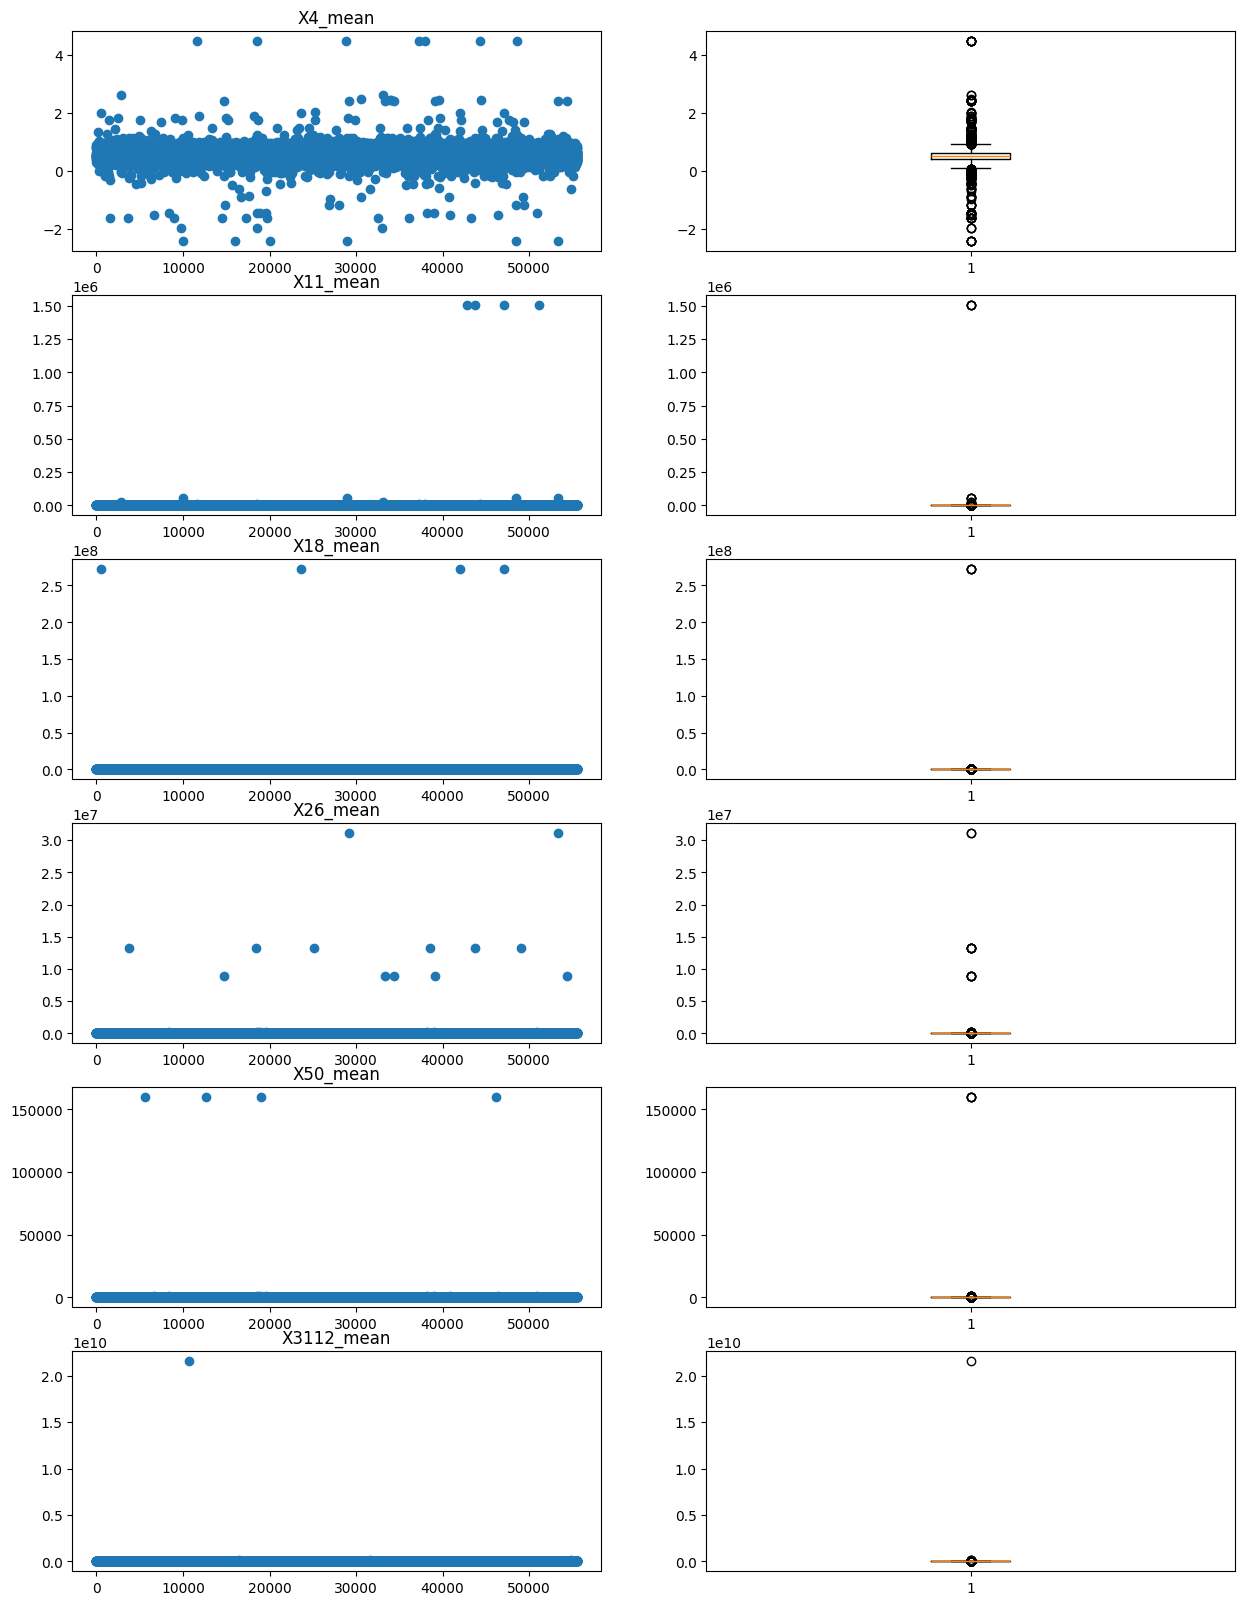

In [13]:
fig, ax = plt.subplots(len(target_vars), 2, figsize=(15, 20))

for i, var in enumerate(target_vars):
    ax[i, 0].scatter(np.arange(len(train_metadata)), train_metadata[var])
    ax[i, 0].set_title(var)
    ax[i, 1].boxplot(train_metadata[var])
    ax[i, 0].set_title(var)

plt.show()

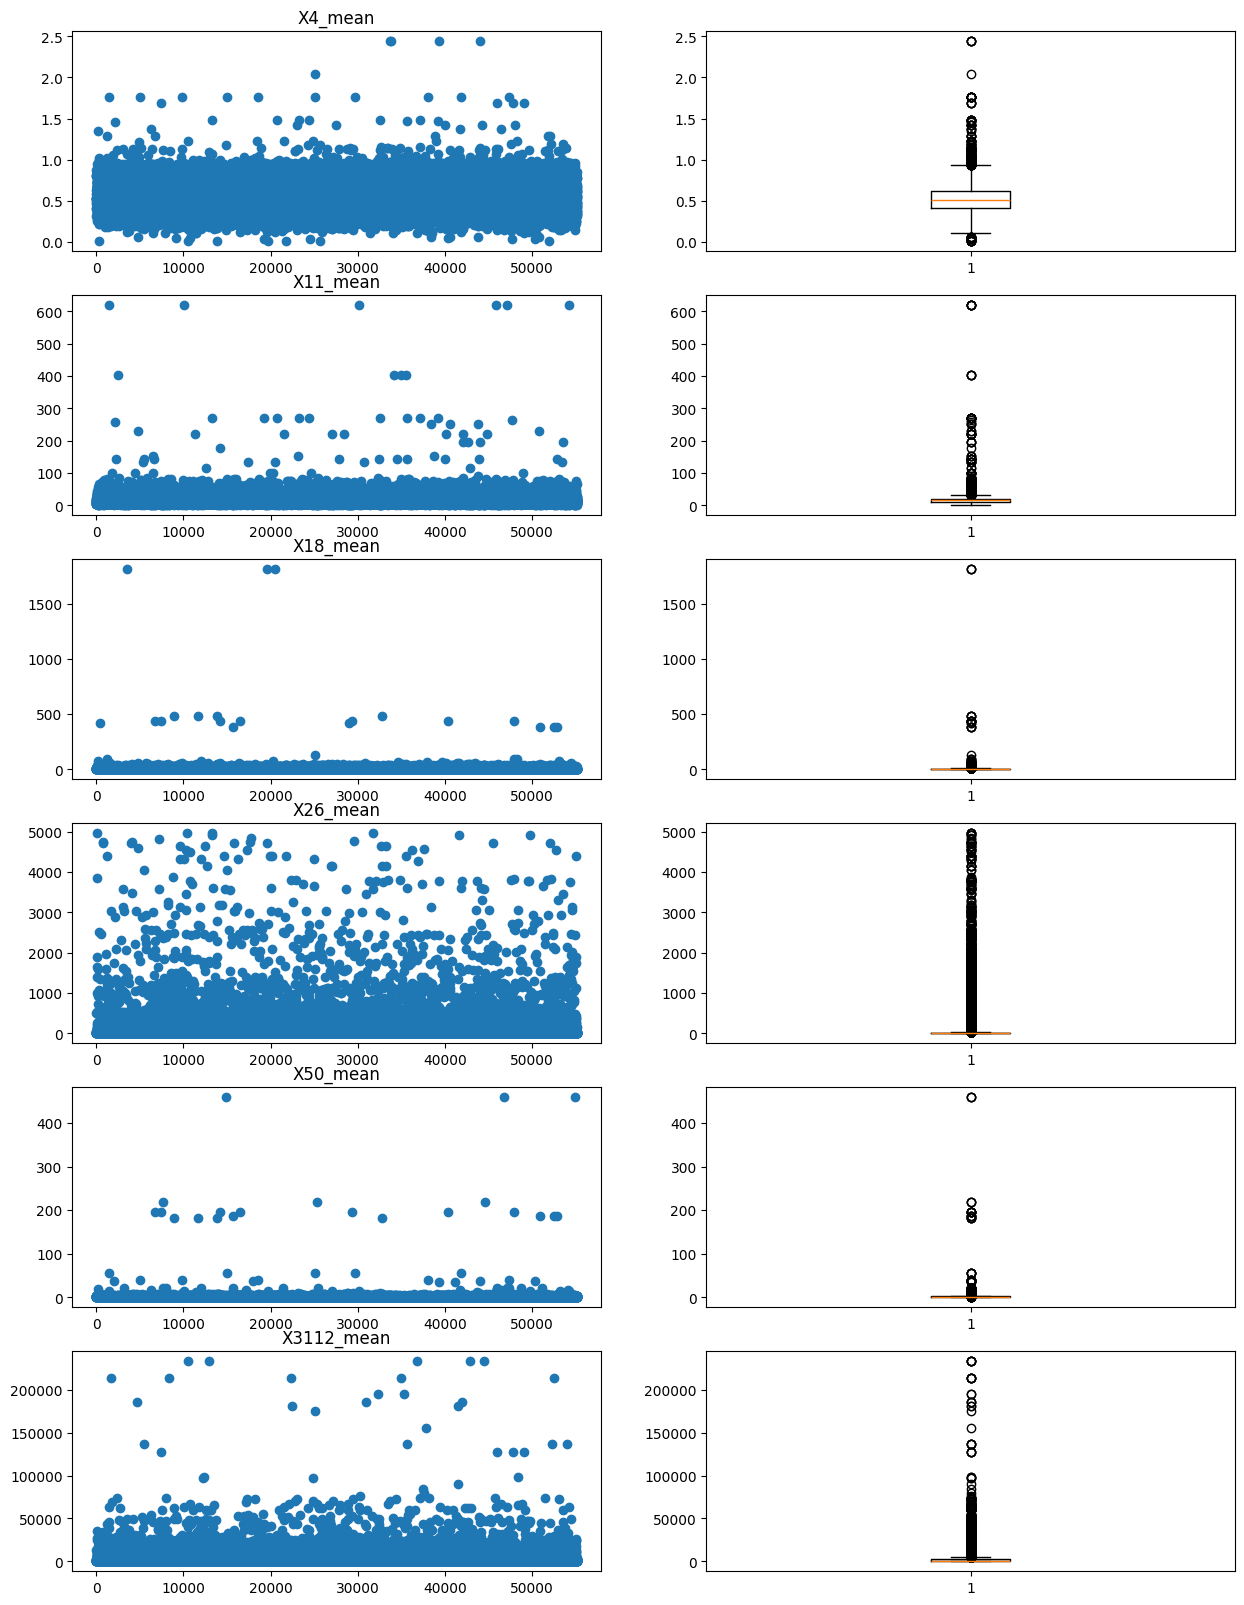

In [15]:
train_metadata_filtered =  train_metadata[(train_metadata['X4_mean'] > 0) &
                        (train_metadata['X11_mean'] < 1000) & 
                        (train_metadata['X18_mean'] < 2000) & 
                        (train_metadata['X26_mean'] < 5000) &     
                        (train_metadata['X50_mean'] < 10000) &                        
                        (train_metadata['X3112_mean'] < 300000)]

fig, ax = plt.subplots(len(target_vars), 2, figsize=(15, 20))

for i, var in enumerate(target_vars):
    ax[i, 0].scatter(np.arange(len(train_metadata_filtered)), train_metadata_filtered[var])
    ax[i, 0].set_title(var)
    ax[i, 1].boxplot(train_metadata_filtered[var])
    ax[i, 0].set_title(var)

plt.show()

**Important** filter those with very high standard deviation relative to the scale and mean of observations. It is recommended to 
use the sd as a feature augmentation to generate different samples that deviate from the mean, but I think this is a bad idea
since we are adding useless data into the model. I think a better approach is to remove them because it means they are 
unreliable, and uncertain, they don't represent correct values.

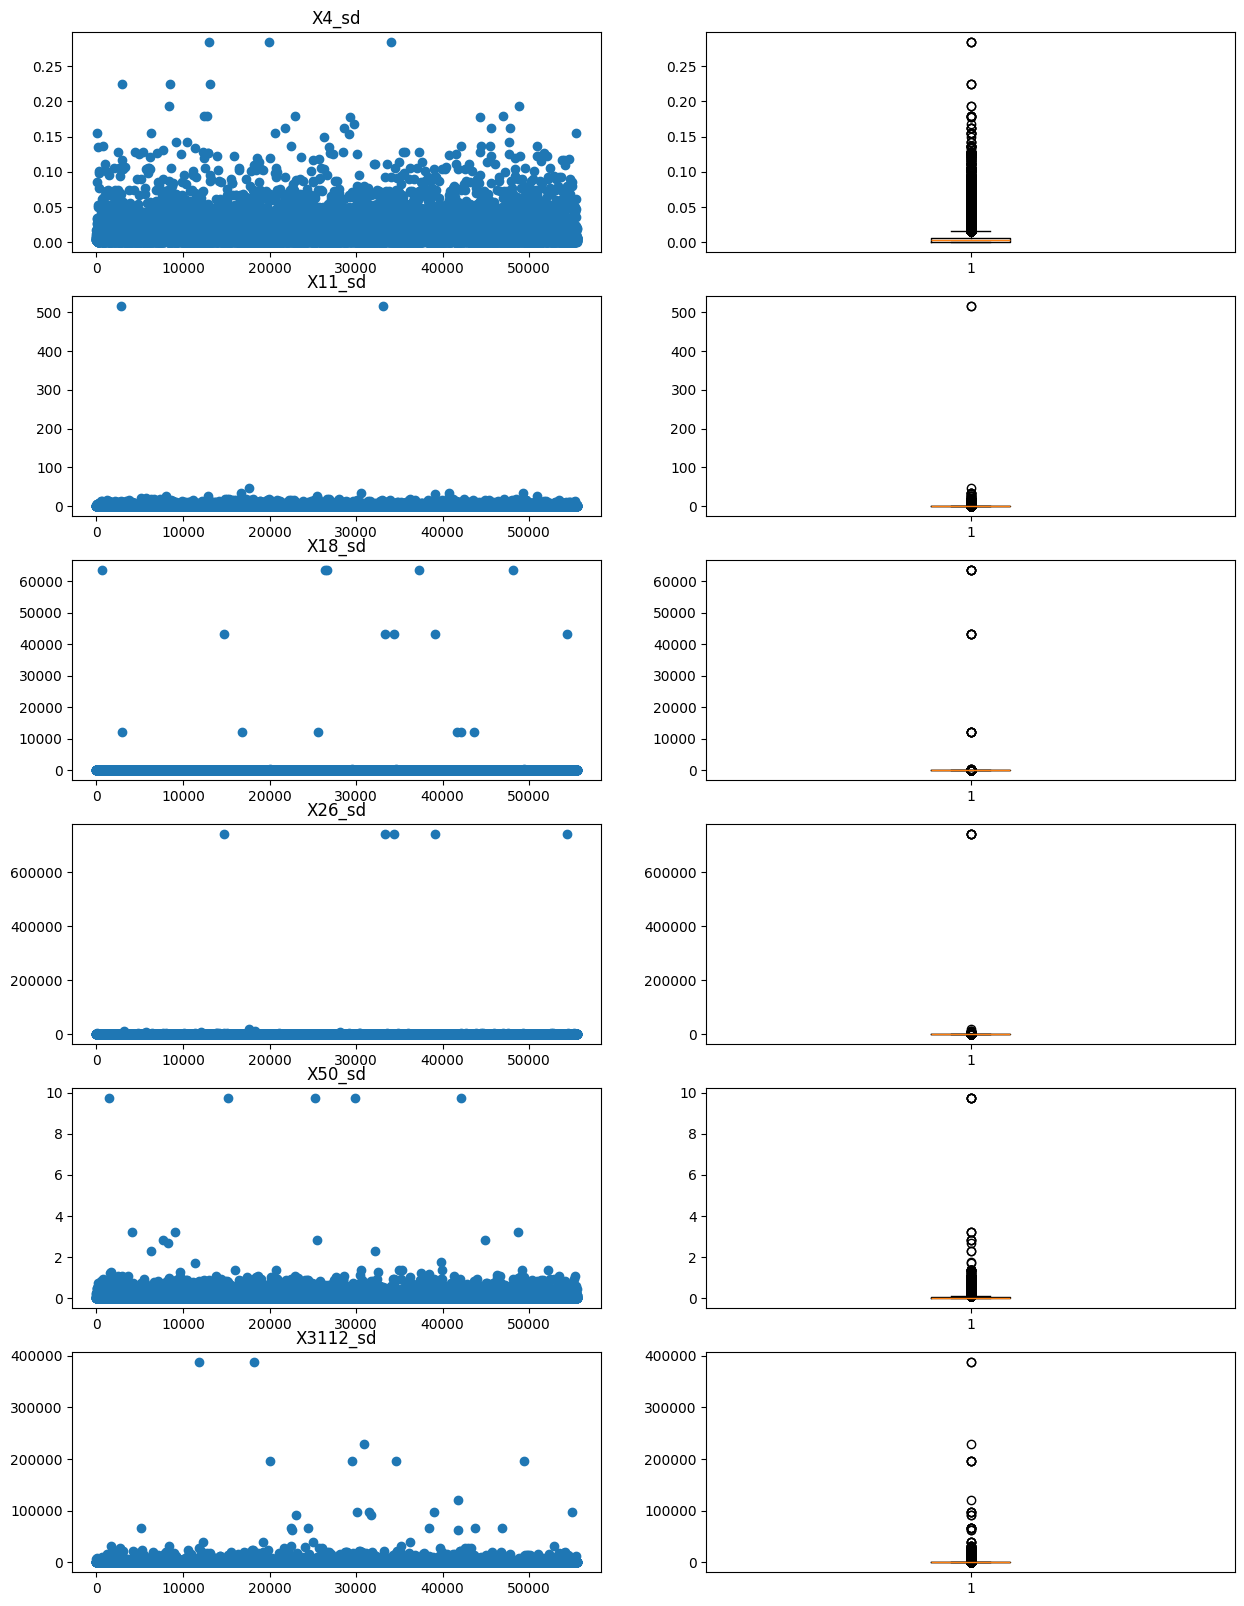

In [18]:
fig, ax = plt.subplots(len(target_vars), 2, figsize=(15, 20))

for i, var in enumerate(target_vars):
    var = var.replace("_mean", "_sd")
    ax[i, 0].scatter(np.arange(len(train_metadata)), train_metadata[var])
    ax[i, 0].set_title(var)
    ax[i, 1].boxplot(train_metadata[var].fillna(0))
    ax[i, 0].set_title(var)

plt.show()

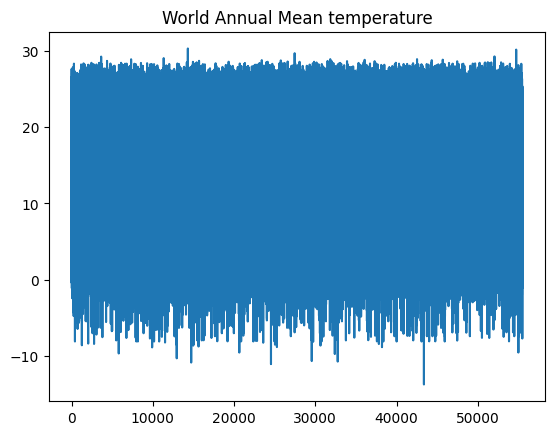

In [26]:
plt.plot(train_metadata['WORLDCLIM_BIO1_annual_mean_temperature'])
plt.title("World Annual Mean temperature")
plt.show()

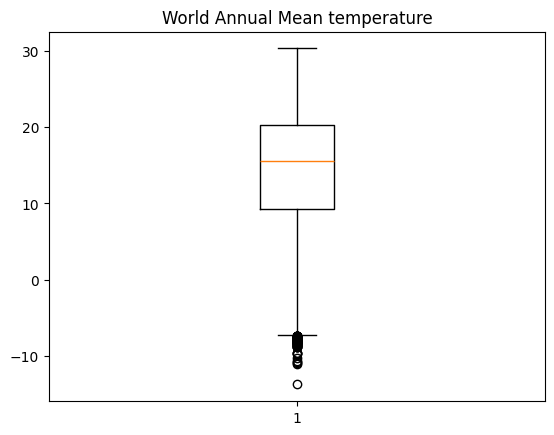

In [27]:
plt.boxplot(train_metadata['WORLDCLIM_BIO1_annual_mean_temperature'])
plt.title("World Annual Mean temperature")
plt.show()

In [32]:
train_metadata[train_metadata.isna().any(axis=1)]

,id,WORLDCLIM_BIO1_annual_mean_temperature,WORLDCLIM_BIO12_annual_precipitation,WORLDCLIM_BIO13.BIO14_delta_precipitation_of_wettest_and_dryest_month,WORLDCLIM_BIO15_precipitation_seasonality,WORLDCLIM_BIO4_temperature_seasonality,WORLDCLIM_BIO7_temperature_annual_range,SOIL_bdod_0.5cm_mean_0.01_deg,SOIL_bdod_100.200cm_mean_0.01_deg,SOIL_bdod_15.30cm_mean_0.01_deg,...,X26_mean,X50_mean,X3112_mean,X4_sd,X11_sd,X18_sd,X26_sd,X50_sd,X3112_sd,path
2,196639184,14.254504,902.071411,49.642857,17.873655,387.977753,22.807142,107,133,119,...,0.395241,2.343153,1130.096731,NaN,NaN,NaN,NaN,NaN,NaN,/home/pol/projects/plant_traits_2024/data/trai...
6,193133748,0.271833,768.048889,50.986668,27.305773,1299.451904,49.694664,101,160,139,...,1.368527,1.195674,709.163496,NaN,NaN,NaN,NaN,NaN,NaN,/home/pol/projects/plant_traits_2024/data/trai...
7,195910523,13.004167,1026.000000,53.000000,14.918256,379.825012,20.049999,99,117,104,...,3.566168,1.733709,2062.304630,NaN,NaN,NaN,NaN,NaN,NaN,/home/pol/projects/plant_traits_2024/data/trai...
12,196314343,9.946926,238.151108,14.048889,18.266577,833.824524,40.026669,145,153,148,...,1.254147,1.734942,414.795507,NaN,NaN,NaN,NaN,NaN,NaN,/home/pol/projects/plant_traits_2024/data/trai...
18,176956365,22.926111,3223.385742,393.752380,57.237907,47.252399,9.375714,103,116,107,...,3844.356802,2.015860,27076.214230,NaN,NaN,NaN,NaN,NaN,NaN,/home/pol/projects/plant_traits_2024/data/trai...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55479,143375475,25.342134,1269.821411,273.744904,104.328812,91.052284,14.505612,124,137,130,...,3.949954,1.294756,3123.383076,NaN,NaN,NaN,NaN,NaN,NaN,/home/pol/projects/plant_traits_2024/data/trai...
55481,193145264,15.907291,1166.500000,184.500000,72.396286,280.652466,20.049999,119,128,122,...,0.950440,1.648881,406.806396,NaN,NaN,NaN,NaN,NaN,NaN,/home/pol/projects/plant_traits_2024/data/trai...
55483,194246645,10.237585,746.724487,38.000000,17.433586,499.778442,26.671429,108,136,122,...,2.592842,1.913140,279.204596,NaN,NaN,NaN,NaN,NaN,NaN,/home/pol/projects/plant_traits_2024/data/trai...
55484,190558785,19.472172,244.795914,39.127552,67.074493,472.710358,27.758673,118,140,131,...,1.783193,1.608341,969.547831,NaN,NaN,NaN,NaN,NaN,NaN,/home/pol/projects/plant_traits_2024/data/trai...


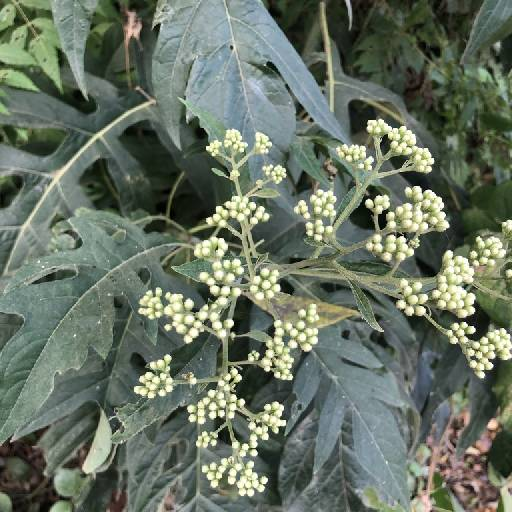

In [37]:
Image(os.path.join(constants.train_images_path, '143375475.jpeg'))